# Erodierte Otsu-Kennzeichnung
Diese Operation segmentiert und kennzeichnet ein Bild unter Verwendung von Unschärfe, Otsu-Schwellenwertbildung, binärer Erosion und maskierter Voronoi-Kennzeichnung.

Nach der Unschärfe und Schwellenwertbildung mit Otsus Methode wird eine iterative binäre Erosion angewendet. Objekte im erodierten Bild werden mittels Zusammenhangskomponenten-Kennzeichnung markiert und diese Kennzeichnungen werden wieder auf die ursprüngliche Größe im Ausgangsbinärbild erweitert, indem eine maskierte Voronoi-Kennzeichnung verwendet wird.

Diese Funktion ähnelt `voronoi_otsu_labeling`. Sie soll besser mit Fällen umgehen können, in denen sich die Kennzeichnungen von Objekten überschneiden, wenn die Objekte dicht beieinander liegen. Wie bei der Voronoi-Otsu-Kennzeichnung können kleine Objekte bei der Anwendung dieser Operation verschwinden.

Diese Funktion ist inspiriert von einer ähnlichen [Implementierung in Java](https://github.com/biovoxxel/bv3dbox/blob/9e38ed02cff606e7e8fbe57db0f6af810bf1a83a/BioVoxxel_3D_Box/src/main/java/de/biovoxxel/bv3dbox/plugins/BV_LabelSplitter.java#L83) von Jan Brocher (Biovoxxel) in der [Biovoxxel Toolbox](https://zenodo.org/badge/latestdoi/434949702). Vielen Dank, Jan!

In [1]:
from skimage.data import cells3d
import pyclesperanto_prototype as cle
import napari_segment_blobs_and_things_with_membranes as nsbatwm

In [2]:
image = cells3d()
image.shape

(60, 2, 256, 256)

Wir schneiden einfach eine 2D-Scheibe heraus.

cl.OCLArray([[ 8868.,  6923.,  5690., ..., 13942., 12804., 14653.],
       [ 7113.,  5501.,  5216., ..., 16739., 13657., 15554.],
       [ 5833.,  7160.,  5928., ..., 15838., 16739., 17166.],
       ...,
       [ 2513.,  3936.,  3414., ...,  3699.,  4126.,  4220.],
       [ 3319.,  3272.,  2513., ...,  3699.,  3367.,  2940.],
       [ 3130.,  3794.,  3225., ...,  2987.,  3746.,  4315.]],
      dtype=float32)
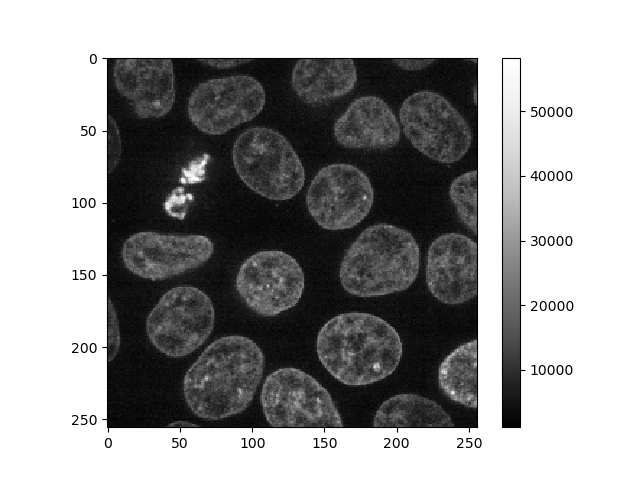
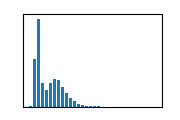

In [3]:
nuclei = cle.asarray(image[30, 1])
nuclei

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
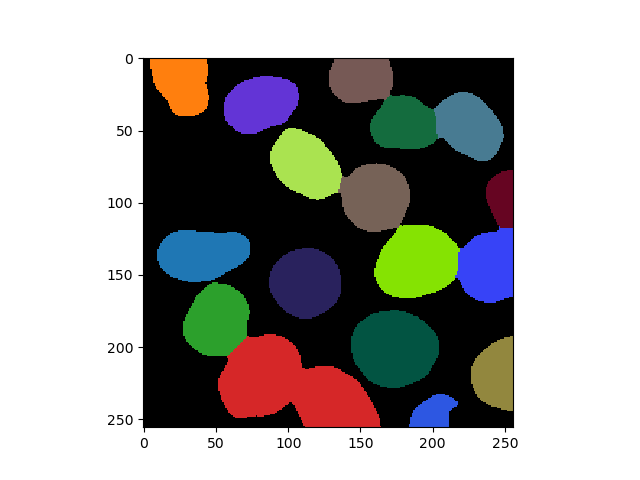

In [4]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=4)
labels

## Parameter: number_of_erosions
Wenn die angegebene Anzahl der Erosionen zu gering ist, werden zusammenhängende Objekte gemeinsam gekennzeichnet.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
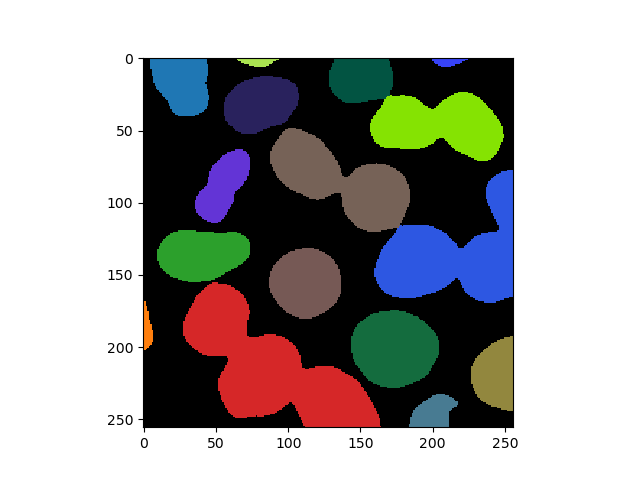

In [5]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=4)
labels

Wenn zu viele Erosionen konfiguriert sind, können Objekte verschwinden.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
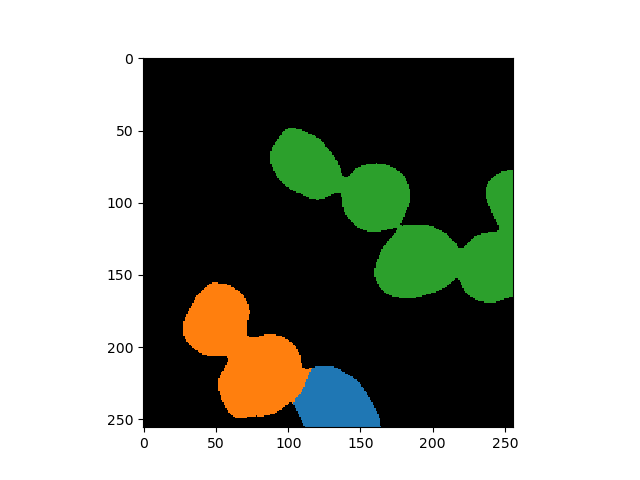

In [6]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=20, outline_sigma=4)
labels

## Parameter: outline_sigma
Mit diesem Umriss können Sie die Rauschunterdrückung vor der Schwellenwertbildung steuern. Wenn dieser Wert zu niedrig ist, können Objekte verrauschte Kanten haben und Löcher führen zu mehr Objekttrennungen.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
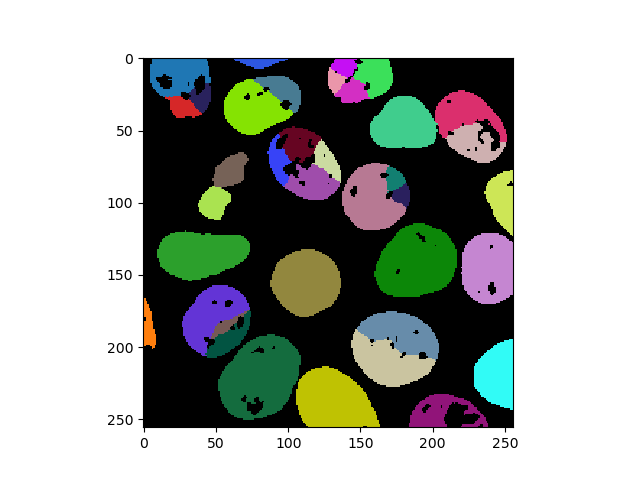

In [7]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=1)
labels

Wenn dieser Wert zu hoch ist, passen die Objektumrisse möglicherweise nicht mehr zu den ursprünglichen Objekten.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
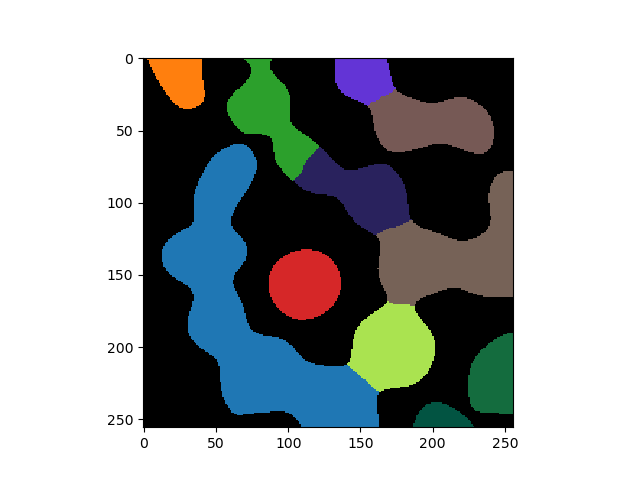

In [8]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=10)
labels